<a href="https://colab.research.google.com/github/dbsdlsdud/AIStudy24/blob/master/%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[시나리오2]

이웃회귀를 통한 물고기 무게 예측

1. 여름에 농어철로 농어 주문이 크게 늘었다.
2. MBC마켓에서 업계최초로 농어를 무게 단위로 판매하려고 한다.
3. 무게단위로 판매하려면 가격 측정도 원활하고 고객도 합리적으로 판단 할 수 있다.
4. 공급처에서 생성 무게를 잘못 측정해서 보낼 경우 농어의 무게를 재측정해야 한다.

다른 데이터는 정상범위가 있으니 예측할 수 있을까? 에 대한 문제 예측 방법 : 회귀 -> 샘플 데이터가 필요하다 (외부에서 56개의 샘플을 받아 처리할 것)

지도학습은 크게 2가지로 나눠진다.

1. 분류(2진분류)
2. 회귀(예측 : 확률(임의의 어떤 숫자로 예측)) : 두 변수 사이에 상관관계 분석

In [ ]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import numpy as np
# 농어 샘플자료 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

기초자료


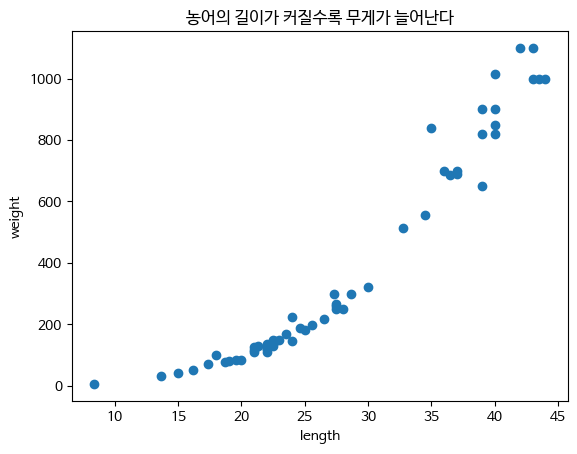

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')   # 한글처리

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어난다')
plt.show()

* 산점도 결과 : 길이가 커짐에 따라 무게도 늘어난다
* 이 데이터를 토대로 훈련과 테스트 진행

# k-최근접 이웃 알고리즘에서의 회귀
* 분류는 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 이 샘플들의 클래스를 확인해서 다수 클래스를 새로운 샘플의 클래스로 예측한다.

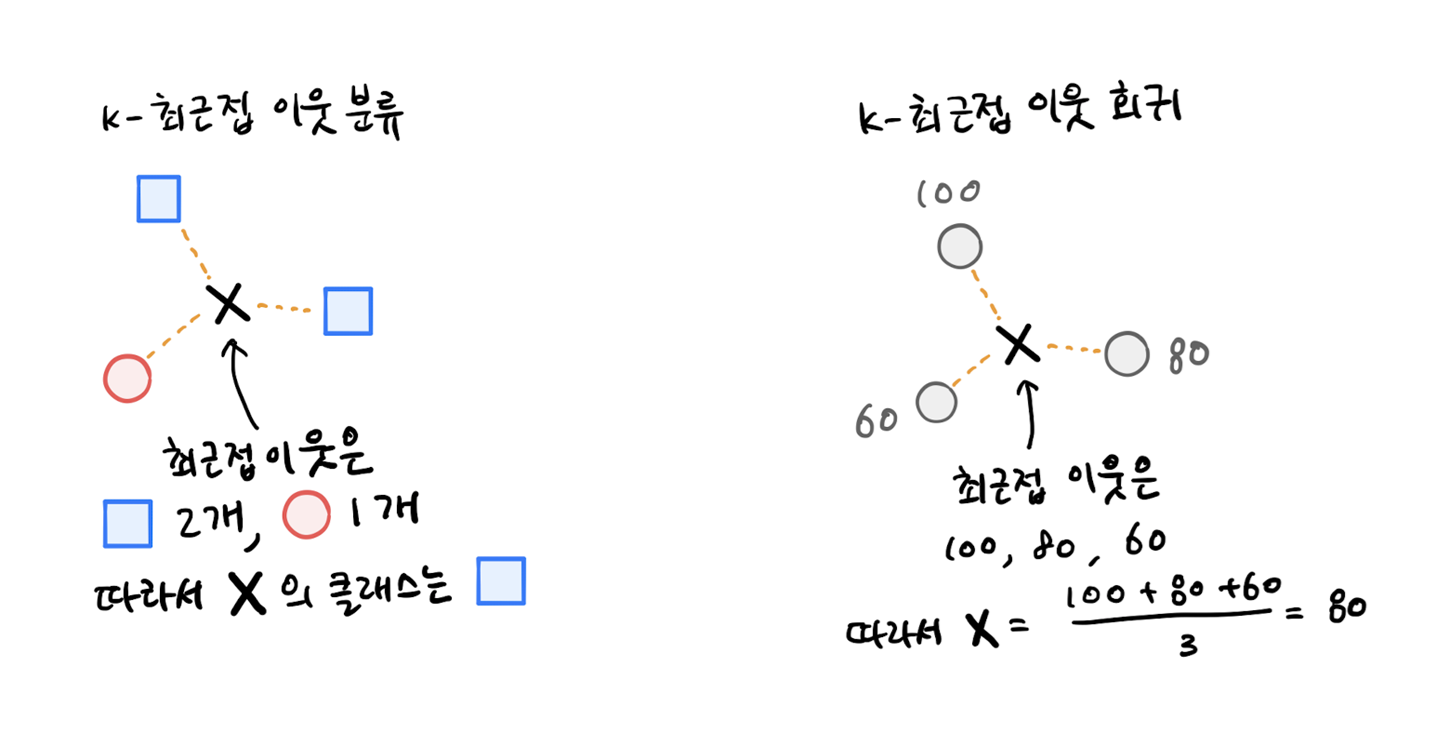

* k가 3일때 2개의 다수가 있어서 분류는 사각형으로 판단한다
* 회귀는 샘플에 가장 가까운 샘플 k개에 대한 평균값으로 판단한다.

사이킷런을 이용해 훈련세트, 테스트세트 나누기
1. perch_length와 perch_weight을 나누어 훈련용 입력값, 정답 & 테스트용 입력값, 정답을 나눈다.
2. random_state : 랜덤 시드를 설정하는 것으로 아무 숫자나 사용해도 상관없지만 수업 할 때 같은 값을 보기 위해 42로 통일

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 훈련세트와 테스트세트로 나눈 결과는 튜플로 나온다.
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


.reshape() 메서드로 2차원 배열로 변환

In [ ]:
test_array = test_array.reshape(2,2)
print('2차원 배열로 변환 된 test_array 크기 확인 : ',test_array.shape)
print(test_array) # (4,) -> (2,2) 크기로 변경

2차원 배열로 변환 된 test_array 크기 확인 :  (2, 2)
[[1 2]
 [3 4]]


입력데이터 train_input과 test_input을 2차원 배열로 변환

넘파이는 배열의 크기를 자동으로 지정하는 기능으로 -1 값을 넣으면 원소 개수로 모두 채우라는 의미이다.

.reshape(행,열) -> 행과 열 기준으로 행에 -1을 지정하면 원소 개수로 모두 채우고 열은 지정한 숫자 만큼 행을 나눠서 줄을 세운다 여기선 1을 지정했으니 한 줄로

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# 전처리 끝, 훈련 시작
from sklearn.neighbors import KNeighborsClassifier -> 분류용

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # 회귀용
# 주어진 데이터에서 K개의 최근접 이웃을 찾아 그들의 평균을 사용해 예측하는 회귀 모델
knr = KNeighborsRegressor() # 임포트된 객체 생성 및 변수에 연결
knr.fit(train_input, train_target) # 회귀용으로 훈련 시작

KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target) # 테스트 시작

0.992809406101064

분류의 경우 테스트세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도)을 예측 값으로 지정하는데 회귀인 경우 평가를 결정 계수라고 한다.

R^2 = 1 - ((타깃 - 예측)^2의 합) / ((타깃 - 평균)^2의 합)

예측 값은 0~1 사이의 값으로 예측이 정확할수록 1에 가까워진다.

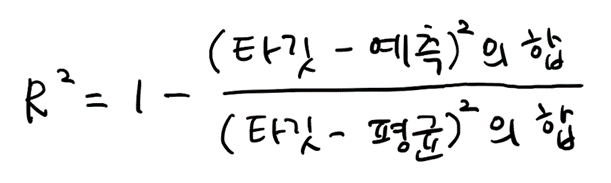

sklearn.metrics 패키지 아래 여러가지 측정도구를 제공하는데 mean_absolute_error 함수는 절대값 오차를 평균하여 반환한다.

In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 예측(prediction) 변수 생성
mae = mean_absolute_error(test_target, test_prediction)
# 테스트 세트에 대한 평균 절댓값 오차 계산 변수 생성
print(mae)  # 결과 : 19g 정도로 타깃값과 다르다 (타깃과 예측한 값 사이의 차이)

19.157142857142862


In [ ]:
knr.score(train_input, train_target) # 훈련한 모델을 사용해 훈련세트 점수확인

0.9698823289099254

위 결과를 보면 모델을 훈련세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어진다.

이 모델을 훈련세트와 테스트세트에서 평가하면 두 값중 어느 것이 높을까 ? -> 보통 훈련세트의 점수가 조금 더 높게 나온다.

1. 훈련세트에서 점수가 굉장히 좋고 테스트세트에서 점수가 굉장히 나쁘면 과대적합
2. 훈련세트보다 테스트세트 점수가 높거나 두 점수가 모두 낮은 경우는 과소적합

사이킷런의 알고리즘 기본값 3개로 조절한 후 모델을 다시 훈련 시작

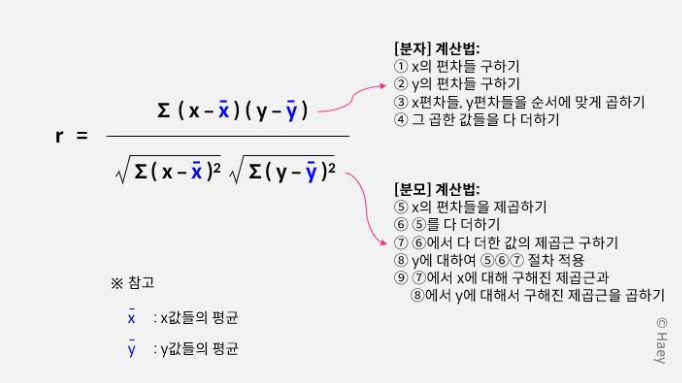

In [ ]:
knr.n_neighbors = 3
knr.fit(train_input, train_target) # 훈련 시작
print(knr.score(train_input, train_target)) # 훈련세트 점수 확인

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))   # 이웃 개수 조정으로 과대,과소 적합 해결

0.9746459963987609


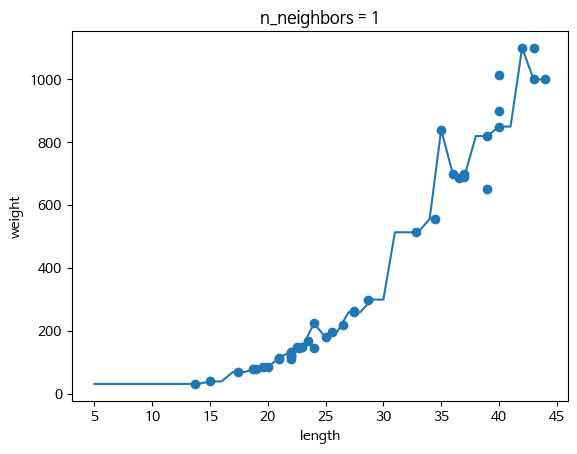

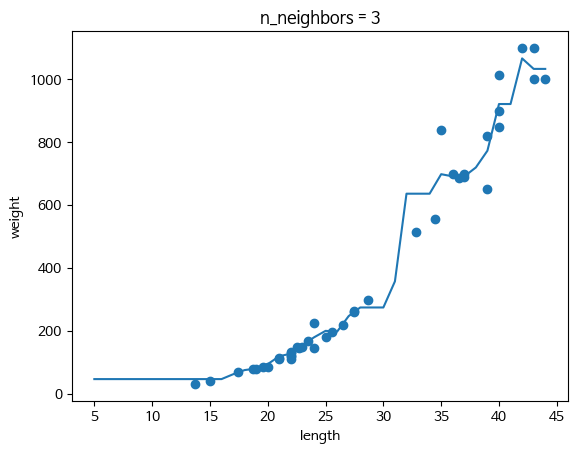

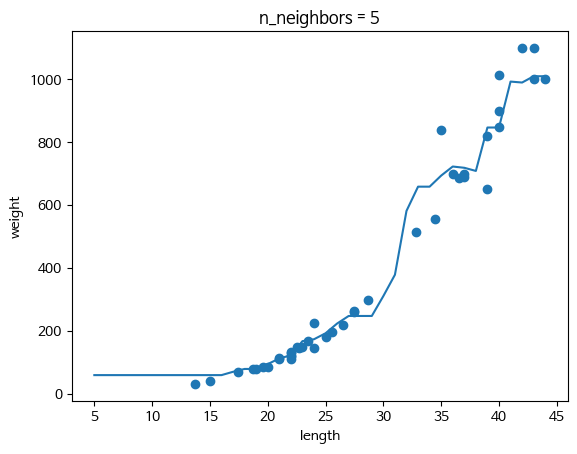

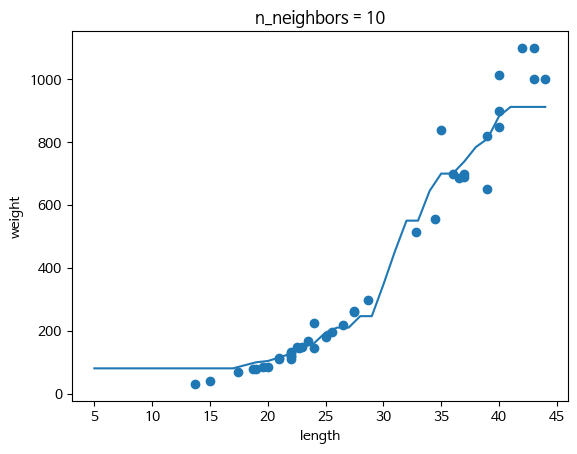

In [ ]:
knr = KNeighborsRegressor() # k-최근접 이웃 회귀 객체
x = np.arange(5, 45).reshape(-1,1) # 5에서 45까지 x좌표를 만든다

# n = 1,3,5,10일대 예측 결과를 그래프로 표현
for n in [1,3,5,10]: # n이 1,3,5,10 숫자 중 하나에 해당 되면
    knr.n_neighbors = n # n을 .n_neighbors에 반환하고
    knr.fit(train_input, train_target) # 훈련 시작
    # 훈련세트 점수와 테스트세트 점수를 계산
    prediction = knr.predict(x) # 지정한 범위 x에 대한 예측
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction) # 선 그래프 표현
    plt.title('n_neighbors = {}'.format(n)) # 그래프 제목 지정
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show() # 훈련세트와 예측 결과 그래프로 표현